# PID Line Follower Camera

Results of the log file for task1 (PID Camera Line Following).

#### PID Parameters
- Angular
  - Max Angular Speed = 0.5
  - Kp = 0.01
  - Ki = 0.01
  - Kd = 0.00

- Linear
 - Max Linear Speed = 0.22
 - Kp = 0.1
 - Ki = 0.01
 - Kd = 0.0

###### Importing libraries for analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###### Loading files log files

Our goal here is to load the log file and create some variables for graph, visualizing the final dataframe

In [3]:
df = pd.read_csv('log_task1.csv')

df['velocity_error'] = df.Linear_Setpoint - abs(df.Linear_Velocity)
df['pixel_error'] = df.Robot_Pixel_Setpoint - df.Robot_Pixel

df.head(n=5)

,Linear_Setpoint,Linear_Velocity,Robot_Pixel,Robot_Pixel_Setpoint,Angular_Velocity,velocity_error,pixel_error
0,0.22,-0.012920,276,320,0.468538,0.207080,44
1,0.22,0.156095,291,320,0.272932,0.063905,29
2,0.22,0.140673,276,320,0.375940,0.079327,44
3,0.22,0.140673,276,320,0.375940,0.079327,44
4,0.22,0.148717,296,320,0.319549,0.071283,24


#### Helper Functions to graph

Here are the functions used to graph

In [9]:
def plot_vars(var1, var2, var3, margin_turns, ylimits, xy_text_label, xlabel, ylabel, title, palette='viridis', vline_color='black'):
    fig, ax = plt.subplots(1, figsize=(12,6))
    sns.set_palette(palette)
    ax = sns.lineplot(
        data=df,
        x=df.index, y=var1,
        palette=palette,
        label=var1,
        ax=ax
    )
    
    sns.lineplot(
        data=df,
        x=df.index, y=var2,
        palette=palette,
        label=var2,
        ax=ax
    )
    
    sns.lineplot(
        data=df,
        x=df.index, y=var3,
        palette=palette,
        label=var3,
        ax=ax
    )
    
 
    x_first_turn = margin_turns[0]
    xy_text_first_turn = xy_text_label[0]
    ax.vlines(linestyles='--', x=x_first_turn[0], ymin=ylimits[0], ymax=ylimits[1], color=vline_color)
    ax.vlines(linestyles='--', x=x_first_turn[1], ymin=ylimits[0], ymax=ylimits[1], color=vline_color)
    ax.text(x=xy_text_first_turn[0], y=xy_text_first_turn[1], s='First Turn')
    
    x_second_turn = margin_turns[1]
    xy_text_second_turn = xy_text_label[1]
    ax.vlines(linestyles='--', x=x_second_turn[0], ymin=ylimits[0], ymax=ylimits[1], color=vline_color)
    ax.vlines(linestyles='--', x=x_second_turn[1], ymin=ylimits[0], ymax=ylimits[1], color=vline_color)
    ax.text(x=xy_text_second_turn[0], y=xy_text_second_turn[1], s='Second Turn')
    ax.set_xlabel('Time')
    ax.set_ylabel('Speed')
    fig.suptitle(title);
    
    ax.legend();
    ax.grid(True)

#### Graph the Linear Setpoint vs Linear Velocity

As we can se in the result, there are some spots that the linear velocity comes very jerky.  This is because the midpoint is flickering over the image and we need to correct it using the PI controller.

On the other hand we can se the distributins are not as spread because it conservates a little well the linear speed an concentrations are near the setpoint.

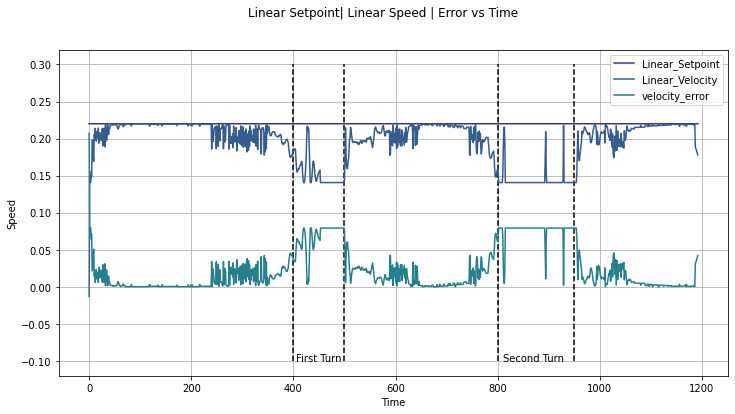

In [10]:
fig = plot_vars(
    var1='Linear_Setpoint',
    var2='Linear_Velocity',
    var3='velocity_error',
    margin_turns=[[400, 500], [800, 950]],
    ylimits=[-0.1, 0.3],
    xy_text_label=[[405, -0.1], [810, -0.1]],
    xlabel='Time',
    ylabel='Speed',
    title='Linear Setpoint| Linear Speed | Error vs Time',
    palette='viridis',
    vline_color='black'
)

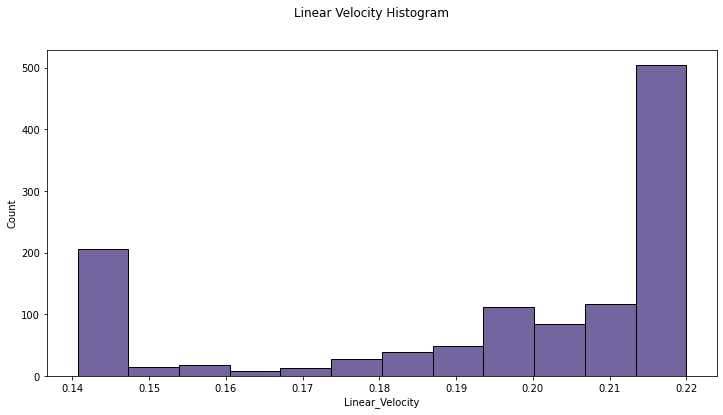

In [11]:
fig, ax = plt.subplots(1, figsize=(12,6))
sns.histplot(df.Linear_Velocity[df.Linear_Velocity > 0.1]);
plt.suptitle('Linear Velocity Histogram');

#### Graph the Pixel Setpoint vs Robot Pixel

Due to the flickering of the robot pixel because the Canny edge will give some errors, we saw that we cannot follow the line when it turns around, that is because we are pointing the camera to the horizon.  If we put the camera looking to the floor we are pretty sure this graph will be very smooth.

Distributions are near the midpoint of the camera but with some outliers regarding the deviation on the turns.

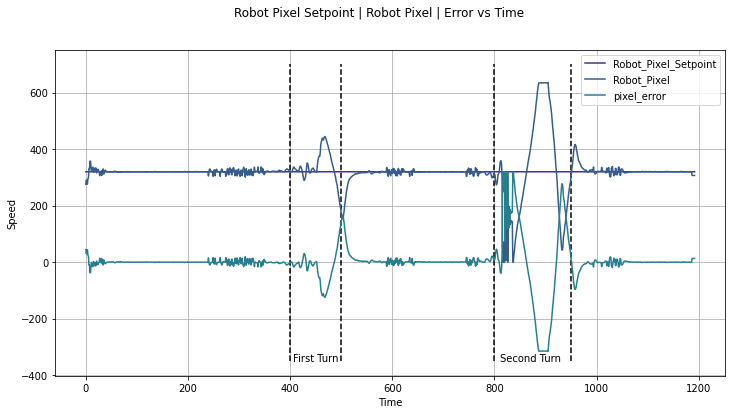

In [12]:
plot_vars(
    var1='Robot_Pixel_Setpoint',
    var2='Robot_Pixel',
    var3='pixel_error',
    margin_turns=[[400, 500], [800, 950]],
    ylimits=[-350, 700],
    xy_text_label=[[405, -350], [810, -350]],
    xlabel='Time',
    ylabel='Speed',
    title='Robot Pixel Setpoint | Robot Pixel | Error vs Time',
    palette='flare',
    vline_color='black'
)
plt.savefig('robot_pixel.png', dpi=300)

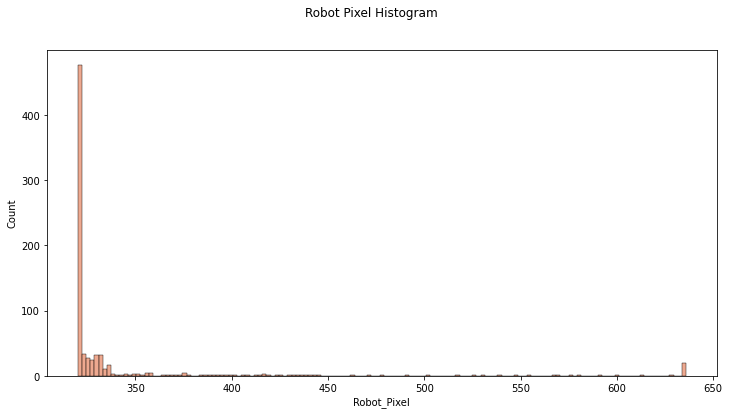

In [13]:
plt.figure(figsize=(12,6))

mean_ = df.Robot_Pixel.mean()
std_  = df.Robot_Pixel.std()

zscore = (df.Robot_Pixel - mean_)/std_

lower_limit = df.Robot_Pixel > df.Robot_Pixel - 2*zscore
upper_limit = df.Robot_Pixel < df.Robot_Pixel + 2*zscore
sns.histplot(df.Robot_Pixel[lower_limit & upper_limit]);

plt.suptitle('Robot Pixel Histogram')
plt.savefig('robot_pixel_hist.png', dpi=300)

#### Graph the Angular Velocity

Again, angular velocity comes very distorted in the turns and we get barely ok in the second.

Anyway, distributions looks good even some mistakes (big ones) fallen on turns.

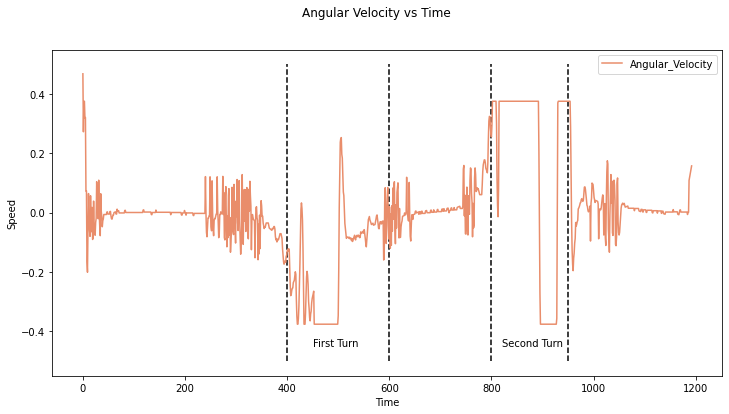

In [14]:
fig, ax = plt.subplots(1, figsize=(12,6))
sns.set_palette('mako')
ax = sns.lineplot(
        data=df,
        x=df.index, y='Angular_Velocity',
        label='Angular_Velocity',
        ax=ax
    )

ax.vlines(linestyles='--', x=400, ymin=-0.5, ymax=0.5, color='black')
ax.vlines(linestyles='--', x=600, ymin=-0.5, ymax=0.5, color='black')
ax.text(x=450, y=-0.45, s='First Turn')

ax.vlines(linestyles='--', x=800, ymin=-0.5, ymax=0.5, color='black')
ax.vlines(linestyles='--', x=950, ymin=-0.5, ymax=0.5, color='black')
ax.text(x=820, y=-0.45, s='Second Turn')

ax.set_xlabel('Time')
ax.set_ylabel('Speed')
fig.suptitle('Angular Velocity vs Time');

plt.savefig('angular_velocity.png', dpi=300)

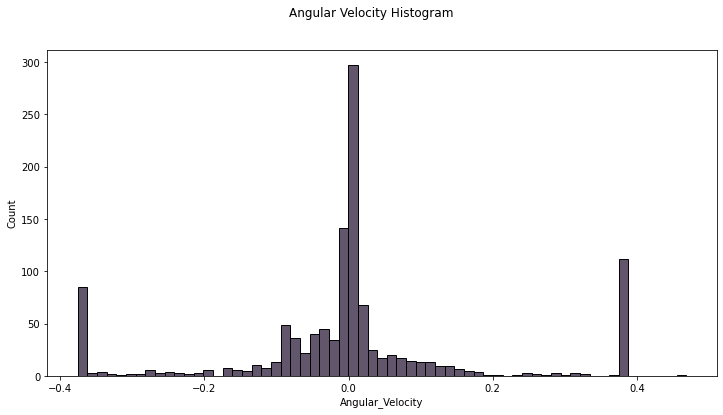

In [15]:
fig, ax = plt.subplots(1, figsize=(12,6))
sns.histplot(df.Angular_Velocity);
fig.suptitle('Angular Velocity Histogram')
plt.savefig('angular_velocity_hist.png', dpi=300)